# Word2Vec Embedding on RNA Sequences

In [10]:
import exoNet
import numpy as np
import pandas as pd

Using TensorFlow backend.


# Loading data

In [11]:
df = pd.read_csv("./Data/final/final.design.mat.subset.shortened.csv")
df.head()

id                                      seq
0   chr13_80888929_80888951_+_ic                  UUUUGAUCAAACGUAGAACCAAU
1       chr12_674559_674597_-_ic  GUGCUAGGUCCCCAGAUCAAGUCAGAUGCCAACGAGAUU
2   chr18_50353832_50353853_-_ic                   ACUUCAAUCUGGGAUUUUUAUA
3  chr2_148657600_148657623_+_ic                 AACUCUCCAUCAUAACAUCAAGAA
4  chr2_191537005_191537027_-_ic                  AUUUCCAUGCCAGGAUUUUUCCC

In [12]:
df['label'] = 0

In [13]:
df.loc[df['id'].str.endswith('ev'), 'label'] = 1

In [14]:
sequences = df['seq'].values

In [15]:
labels = df['label'].values

In [16]:
sequences.shape

(200221,)

# Sequence Pre-processing 

## K-mer extracting & Tokenizing

In [17]:
window_size = 4 # k-mer length

In [18]:
vocab = set()
corpus = []
corpus_labels = []

In [19]:
for idx, seq in enumerate(sequences): 
    words = []
    for i in range(len(seq) - window_size + 1):
        words.append(seq[i:i + window_size])
    for i in range(window_size):
        corpus.append(words[i::window_size])
        corpus_labels.append(labels[idx])
    vocab |= set(words)

In [20]:
len(corpus), len(corpus_labels)

(800884, 800884)

In [21]:
corpus_labels = np.array(corpus_labels)

In [22]:
vocab_size = len(vocab)
vocab_size

256

In [23]:
vocab_dict = dict(list(enumerate(vocab)))

In [24]:
vocab_dict = dict((v, k) for k, v in vocab_dict.items())

In [25]:
max_length = 15

In [26]:
encoded_corpus = []

In [27]:
for seq in corpus:
    seq_encoded = []
    for kmer in seq:
        seq_encoded.append(vocab_dict.get(kmer, -1))
    encoded_corpus.append(seq_encoded)

In [28]:
from keras.preprocessing.sequence import pad_sequences

In [29]:
padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post', truncating='post', value=-1)
padded_corpus.shape

(800884, 15)

# Building the network

In [30]:
from keras.layers import Embedding, Dense, Dropout, BatchNormalization, LeakyReLU, GRU, Input
from keras.models import Model

In [31]:
embedding_dim = 128
dropout_rate = 0.2

In [30]:
import pandas as pd

In [34]:
pd.read_csv("/media/pgdrive/sharif/exosomians/MutationMaps/ExoCNN/ev.extreme.99.mutation.map.1.csv")

id  \
0         chr1_7930313_7930348_-_ev   
1       chr3_63893767_63893787_+_ev   
2     chr1_148537037_148537058_-_ev   
3     chr1_149534873_149534894_+_ev   
4       chr6_34821511_34821541_+_ev   
5       chr9_75181520_75181554_-_ev   
6     chr4_156659715_156659733_+_ev   
7      chr14_67617302_67617334_-_ev   
8     chr2_147472133_147472165_-_ev   
9      chr20_48990611_48990630_-_ev   
10     chr16_30471674_30471701_+_ev   
11     chr13_45337479_45337502_-_ev   
12     chr17_76703634_76703655_-_ev   
13     chr12_76049230_76049252_-_ev   
14     chr11_93719686_93719714_+_ev   
15        chr2_9615344_9615372_+_ev   
16      chr2_88729563_88729582_+_ev   
17     chr15_72920300_72920335_-_ev   
18   chr11_118970497_118970534_+_ev   
19     chr11_43331260_43331298_+_ev   
20         chr16_439297_439324_-_ev   
21      chr9_37160213_37160235_+_ev   
22    chr1_161420870_161420896_+_ev   
23     chr16_86275429_86275454_-_ev   
24     chr22_48399111_48399129_+_ev   
25    chr4_157768012_157768050_-_ev   
26    chr5_176556781_176556804_+_ev   
27    chrX_134068293_134068316_+_ev   
28      chr7_69062421_69062460_+_ev   
29   chr12_101446906_101446931_+_ev   
..                              ...   
373   chr1_145336884_145336915_-_ev   
374   chr1_146094027_146094058_-_ev   
375   chr1_145360673_145360704_-_ev   
376      chr21_8394709_8394752_+_ev   
377     chr2_97775940_97775972_-_ev   
378   chrX_144010076_144010094_+_ev   
379     chr1_19456730_19456748_+_ev   
380   chr1_148541757_148541782_-_ev   
381   chr1_148555893_148555923_-_ev   
382    chr13_95310829_95310862_-_ev   
383   chr1_145322569_145322596_-_ev   
384   chr1_148546471_148546498_-_ev   
385   chr1_146075072_146075099_-_ev   
386     chr2_13924087_13924106_+_ev   
387   chr1_145308279_145308305_-_ev   
388    chr12_49719493_49719522_+_ev   
389       chr9_6717391_6717418_+_ev   
390   chr2_216577463_216577496_-_ev   
391    chr15_24031683_24031717_+_ev   
392     chr3_49613319_49613354_+_ev   
393      chr21_8211683_8211719_+_ev   
394   chr1_146117573_146117607_-_ev   
395     chr7_10982618_10982664_+_ev   
396      chr21_8438933_8438968_+_ev   
397    chr13_45975466_45975498_-_ev   
398     chrX_44378922_44378948_+_ev   
399   chr4_153685316_153685344_+_ev   
400   chr1_156296609_156296652_+_ev   
401     chr2_66435303_66435333_+_ev   
402     chr7_21088250_21088287_+_ev   

                                                 seq  \
0               GCGAGCGCGGAAUCCUAACCACUAGACUACCAGGGA   
1                              CACCGACAUCGAGUCGUCCAU   
2                             UUCCCCUUCUUUUCUUCCCCUU   
3                             UUCCCCUUCUUUUCUUCCCCUU   
4                    AGUGAGGGUGACGAAGUGAACUGAUCGGAAU   
5                UUAAGGCUAGUCAAGUGAAGCAGUGGGAGUGGAGA   
6                                UAACCGACAUCGAGUCGAC   
7                  UUAAGACUAGUCAAGUGCAGUAGUGAGAAGGGG   
8                  UUAAGACUAGUCAAGUGCAGUAGUGAGAAGGGG   
9                               CCCCACUCUGCCACCUCUCC   
10                      UGAGGGAGACGAAGUGAACUGAUCGGAU   
11                          AAGAUGUAUUCCCCAAUUCAAUCU   
12                            AAAGCCAGUUAACUUUAGCAGU   
13                           AUCUCCUUCUUCUUCCCCUUCCU   
14                     CAAGAGUGAUGACGUGAACUGAUCAGAAU   
15                     AAAGAGUGAUGACGUGAACUGAUCAGAAU   
16                              ACUUACAUCACUUCCCUUCA   
17              GAGAGCACUGAAUCCUAACCACUAGACCACGAGGGA   
18            ACCGAACAGACUACCAUCACCCAAUAGUCUUGAAUAAU   
19           ACCGACCAUGUUACCAUCACCCAAUAGUCUUGAAUAAUU   
20                      UCAUGGCUAGUCAAGUGAAGCAGUGGGA   
21                           GUGAAGAAGUGAACUGAUCGGAA   
22                       GAGGGACCACCAGAUCACCGAUCCUAA   
23                        UUUUAGCCAGUCAAAUUUAGCAGUGA   
24                               ACGUGGACAUCGAGUCGAC   
25           UUAAAGGCUAGUCAAGUGAAGCAGUGGGAGUGGAGAAGG   
26                          UUGACGAAGUGAACUGAUCGGAAU   
27                          UUGACGAAGUGAACUGAU

In [32]:
input_sequences = Input(shape=(max_length,))
embedding = Embedding(vocab_size, embedding_dim, input_length=max_length)(input_sequences)
gru = GRU(32)(embedding)
gru = Dropout(dropout_rate)(gru)
dense = Dense(1, activation='sigmoid')(gru)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model = Model(input_sequences, dense)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           32768     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                15456     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 48,257
Trainable params: 48,257
Non-trainable params: 0
_________________________________________________________________


# Train/Test split

In [34]:
padded_corpus.shape, corpus_labels.shape

((800884, 15), (800884,))

In [35]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [36]:
x_train, x_test, y_train, y_test = train_test_split(padded_corpus, corpus_labels, test_size=0.2, stratify=corpus_labels)

In [37]:
x_train.shape, y_train.shape

((640707, 15), (640707,))

In [38]:
x_test.shape, y_test.shape

((160177, 15), (160177,))

# Train model with tokenized sequences

In [39]:
from keras import backend as K
from keras.callbacks import EarlyStopping

In [40]:
def sensitivity(y_true, y_pred):
    true_positives = K.cast(K.sum(K.round(K.clip(y_true * y_pred, 0, 1))), 'float32')
    possible_positives = K.cast(K.sum(K.round(K.clip(y_true, 0, 1))), 'float32')
    return true_positives / (possible_positives + K.constant(K.epsilon()))


def specificity(y_true, y_pred):
    true_negatives = K.cast(K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1))), 'float32')
    possible_negatives = K.cast(K.sum(K.round(K.clip(1 - y_true, 0, 1))), 'float32')
    return true_negatives / (possible_negatives + K.constant(K.epsilon()))

In [41]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc', sensitivity, specificity])

In [42]:
model.fit(x_train, 
          y_train,
          batch_size=128,
          epochs=500,
          verbose=1,
          validation_data=(x_test, y_test),
          class_weight={0: 0.2, 1: 0.8},
          callbacks=[EarlyStopping(patience=5)]
         )

Instructions for updating:
Use tf.cast instead.
Train on 640707 samples, validate on 160177 samples
Epoch 1/500
640707/640707 [==============================] - 196s 307us/step - loss: 0.1777 - acc: 0.7112 - sensitivity: 0.7352 - specificity: 0.7051 - val_loss: 0.5096 - val_acc: 0.7386 - val_sensitivity: 0.7557 - val_specificity: 0.7342
Epoch 2/500
640707/640707 [==============================] - 191s 298us/step - loss: 0.1644 - acc: 0.7336 - sensitivity: 0.7790 - specificity: 0.7221 - val_loss: 0.5504 - val_acc: 0.7160 - val_sensitivity: 0.8133 - val_specificity: 0.6913
Epoch 3/500
640707/640707 [==============================] - 191s 298us/step - loss: 0.1597 - acc: 0.7441 - sensitivity: 0.7888 - specificity: 0.7328 - val_loss: 0.4801 - val_acc: 0.7567 - val_sensitivity: 0.7649 - val_specificity: 0.7545
Epoch 4/500
640707/640707 [==============================] - 191s 298us/step - loss: 0.1568 - acc: 0.7496 - sensitivity: 0.7959 - specificity: 0.7381 - val_loss: 0.4988 - val_acc: 0.7

In [48]:
sub_model = Model(input_sequences, model.layers[-3].output)
sub_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           32768     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                15456     
Total params: 48,224
Trainable params: 48,224
Non-trainable params: 0
_________________________________________________________________


# Visualize Latent layer

In [55]:
import scanpy as sc

In [54]:
latent = sub_model.predict(padded_corpus)
latent.shape

(800884, 32)

In [56]:
latent_adata = sc.AnnData(X=latent)
latent_adata.obs['label'] = corpus_labels

In [57]:
latent_adata

AnnData object with n_obs × n_vars = 800884 × 32 
    obs: 'label'

In [ ]:
sc.pp.neighbors(latent_adata)
sc.tl.umap(latent_adata)

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/mohsen/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../anaconda3/envs/mohsen/lib/python3.

In [61]:
sc.set_figure_params(dpi=300)

In [63]:
latent_adata.obs['label'] = pd.Categorical(latent_adata.obs['label'])

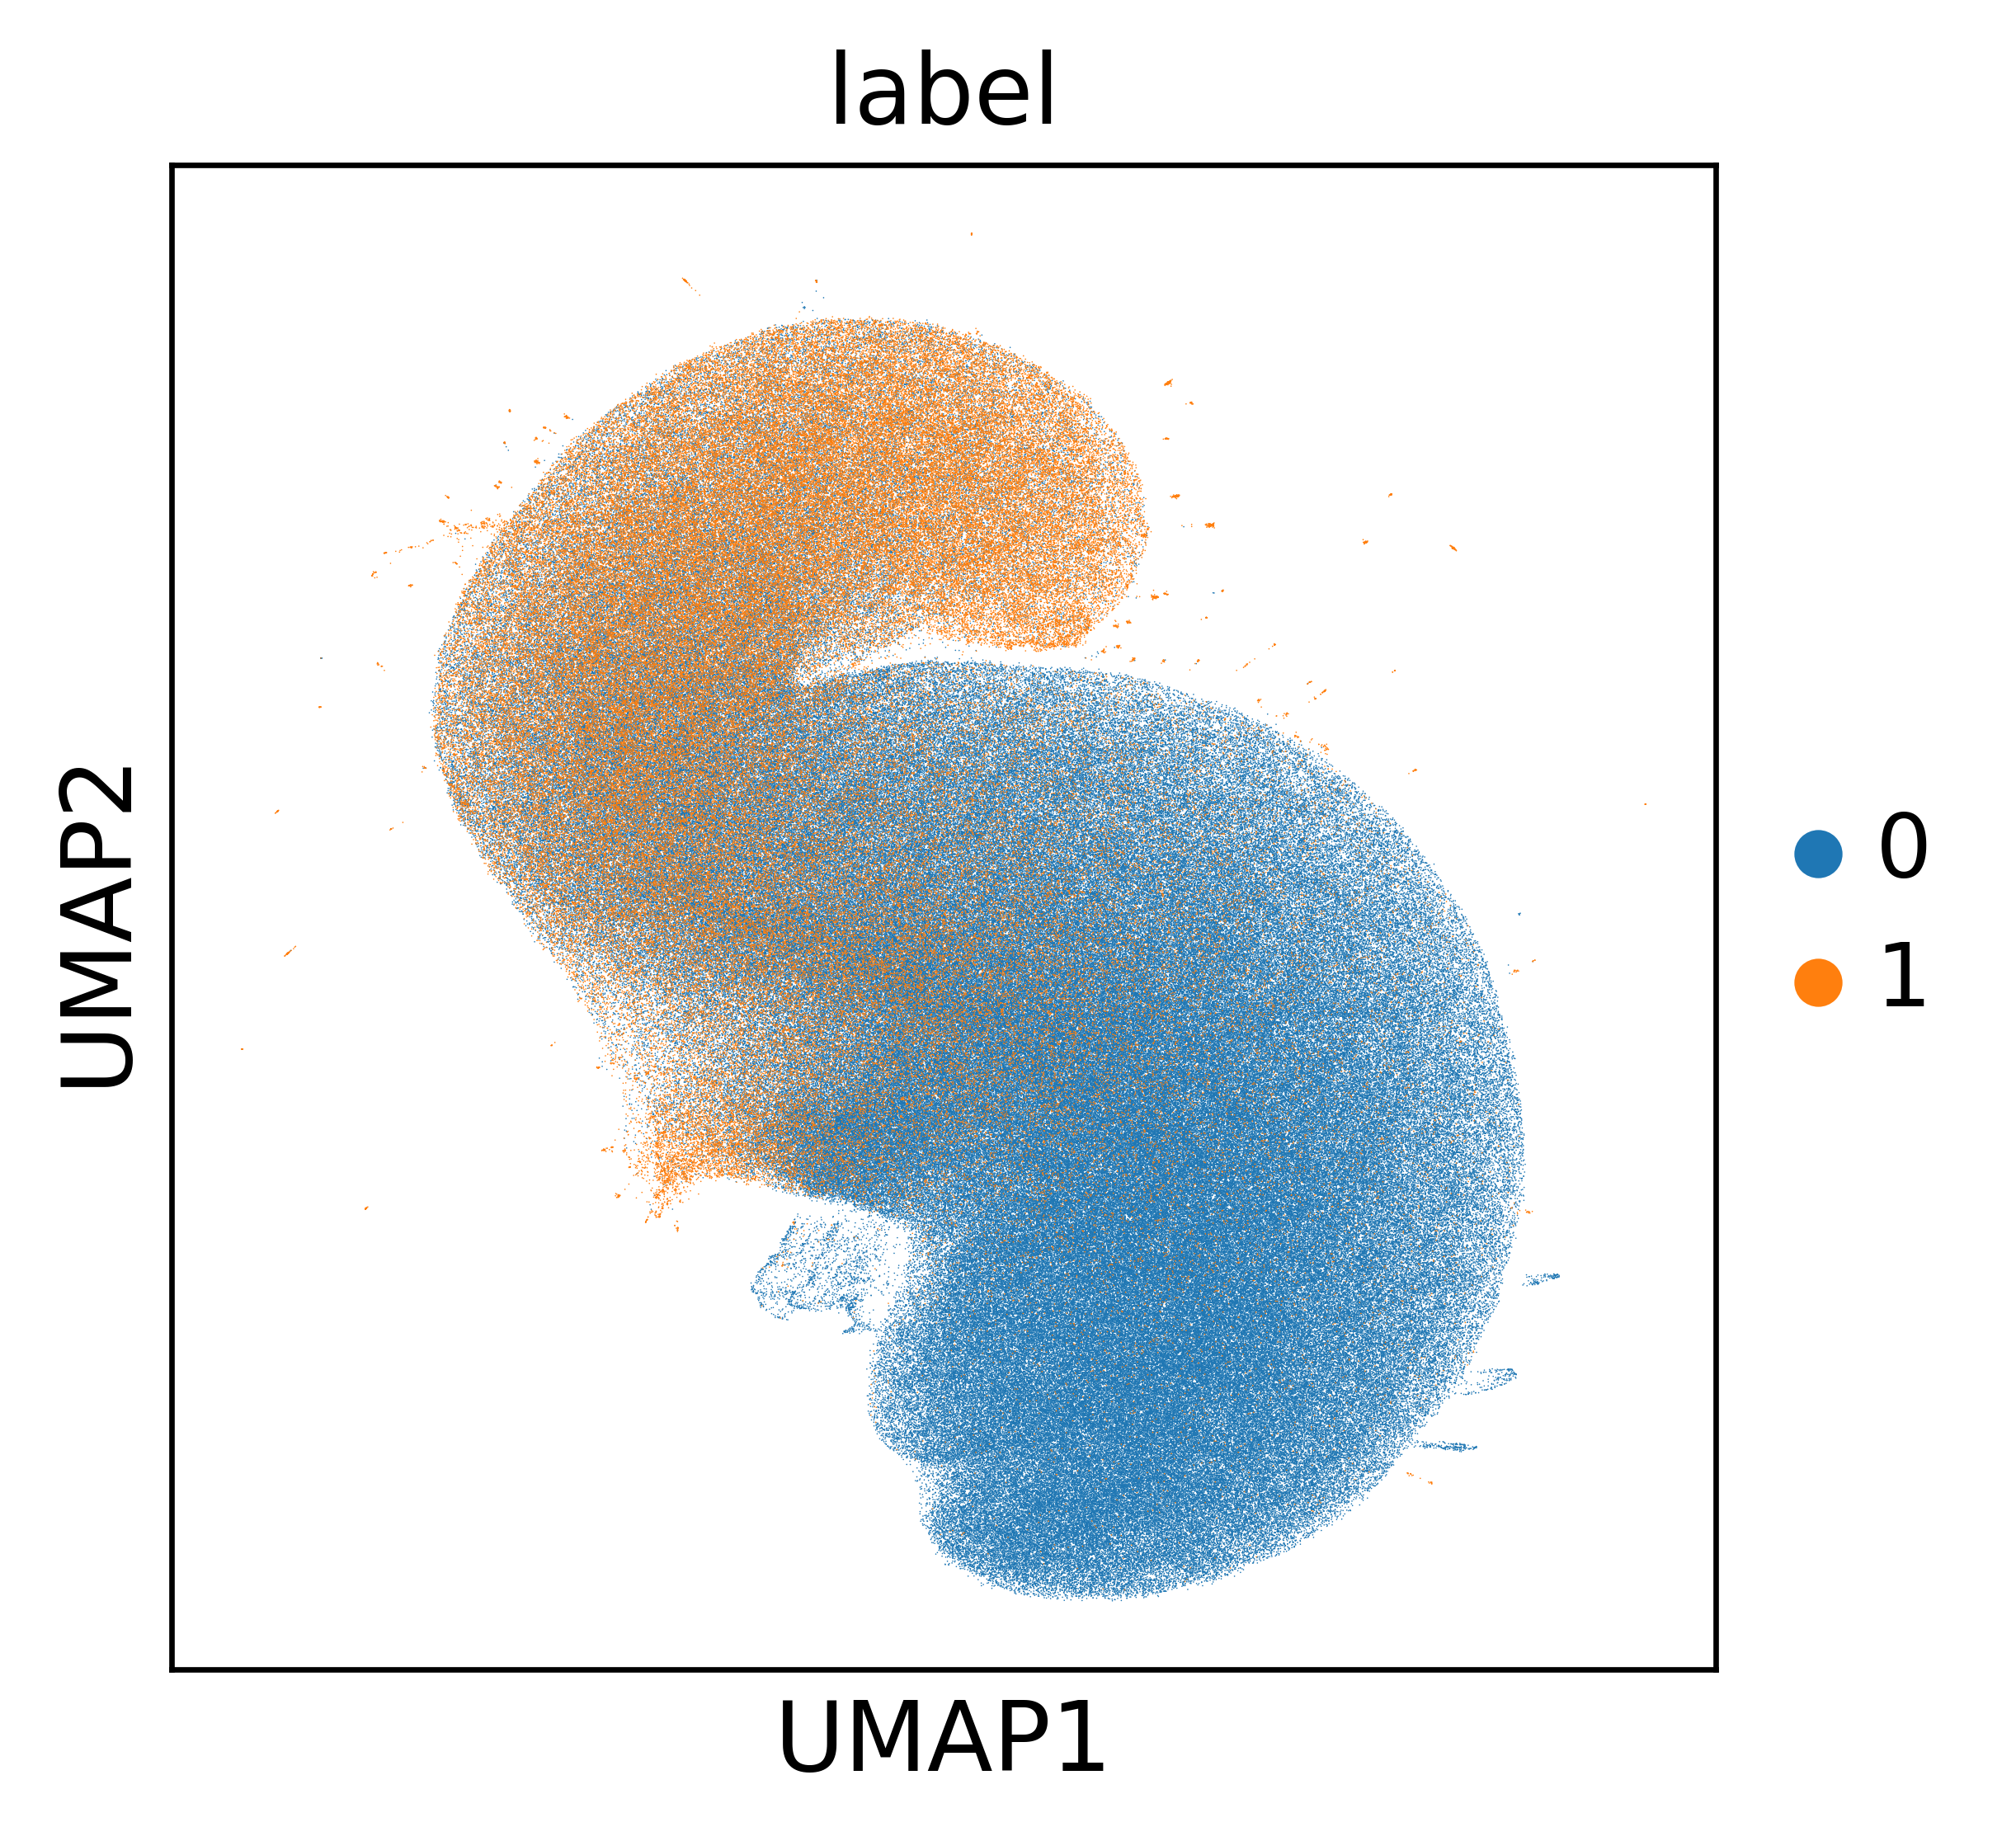

In [64]:
sc.pl.umap(latent_adata, color='label')